In [5]:
from sampling.smc import Sampler
import jax
import jax.numpy as jnp

temp_init = 10.0
temp_final = 1.0

class StandardNormal():
    """Standard Normal distribution in d dimensions"""

    def __init__(self, d):
        self.d = d
        self.grad_nlogp = jax.value_and_grad(self.nlogp)


    def nlogp(self, x):
        """- log p of the target distribution"""
        return 0.5 * jnp.sum(jnp.square(x), axis= -1)

    def prior_draw(self, key):
        return jax.random.normal(key, shape = (self.d, ), dtype = 'float64') * jnp.sqrt(temp_init) #start from the distribution at high temperature


target = StandardNormal(d = 10)

sampler = Sampler(target)

x = sampler.sample(steps_at_each_temp = 1000, tune_steps= 100, num_chains= 1000, temp_init=temp_init, temp_final=temp_final, ess=0.8)


print(x)

T: 7.934140205383301
T: 6.289180278778076
T: 4.99062967300415
T: 3.948193311691284
T: 3.1125500202178955
T: 2.480544328689575
T: 1.962662935256958
T: 1.5479286909103394
T: 1.2181185483932495
T: 1.0006999969482422
[[-2.057352    1.1092976   0.80391675 ...  0.37964222  0.09929569
  -0.03472789]
 [-0.6339323   0.04420332  0.04116813 ... -0.38555458  0.515353
   0.58622646]
 [-1.1207352   2.239424    1.118692   ... -0.20855463  0.161166
   0.00908814]
 ...
 [ 1.5905364   1.14669    -0.76112944 ... -0.19659579 -0.9907174
   0.59807986]
 [ 0.5725722   0.8527018  -0.30675724 ...  0.19559085  0.4317238
   0.5072512 ]
 [ 0.23262183  0.7745884  -1.3525946  ... -1.9037026   1.699978
  -1.635683  ]]


In [6]:
x.shape

(1000, 10)

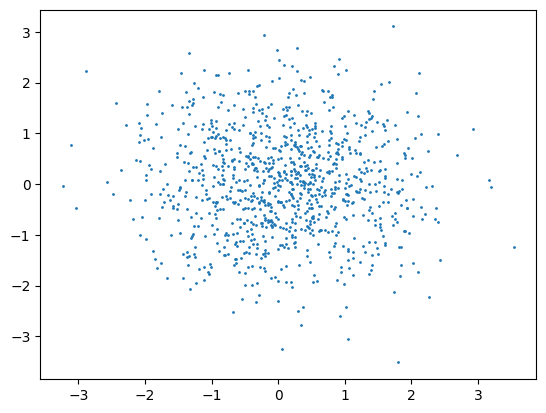

In [7]:
import matplotlib.pyplot as plt 

plt.scatter(x[:,0], x[:,1], s=1);

In [8]:
jnp.std(x, axis=0)

Array([1.0328753 , 1.0215394 , 1.0289255 , 1.0051256 , 1.0394958 ,
       1.0267732 , 1.0310154 , 1.0171338 , 1.0372777 , 0.97704905],      dtype=float32)